<a href="https://colab.research.google.com/github/youchulJ/YOLOv8_Custom_Gwanganri_Detection/blob/main/Project_sponsored%20by%20KMI_(Weight_part1_24.04.09).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Tue Apr  9 06:03:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
#내가 새롭게 만든 데이터셋 넣기 (yolov8)
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="gmbOqcBg6C1BuH9nAyeA")
project = rf.workspace("pusan-national-university-xef1d").project("gwangalli-beach-detection")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Gwangalli-beach---Detection--2 in yolov8:: 100%|██████████| 7938/7938 [00:01<00:00, 4529.77it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 167MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Gwangalli-beach---Detection--2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1712642955.5aba3f2326cb.2003.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch3255.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch3256.jpg    weights
R_curve.png					    train_batch3257.jpg
results.csv					    val_batch0_labels.jpg


/content


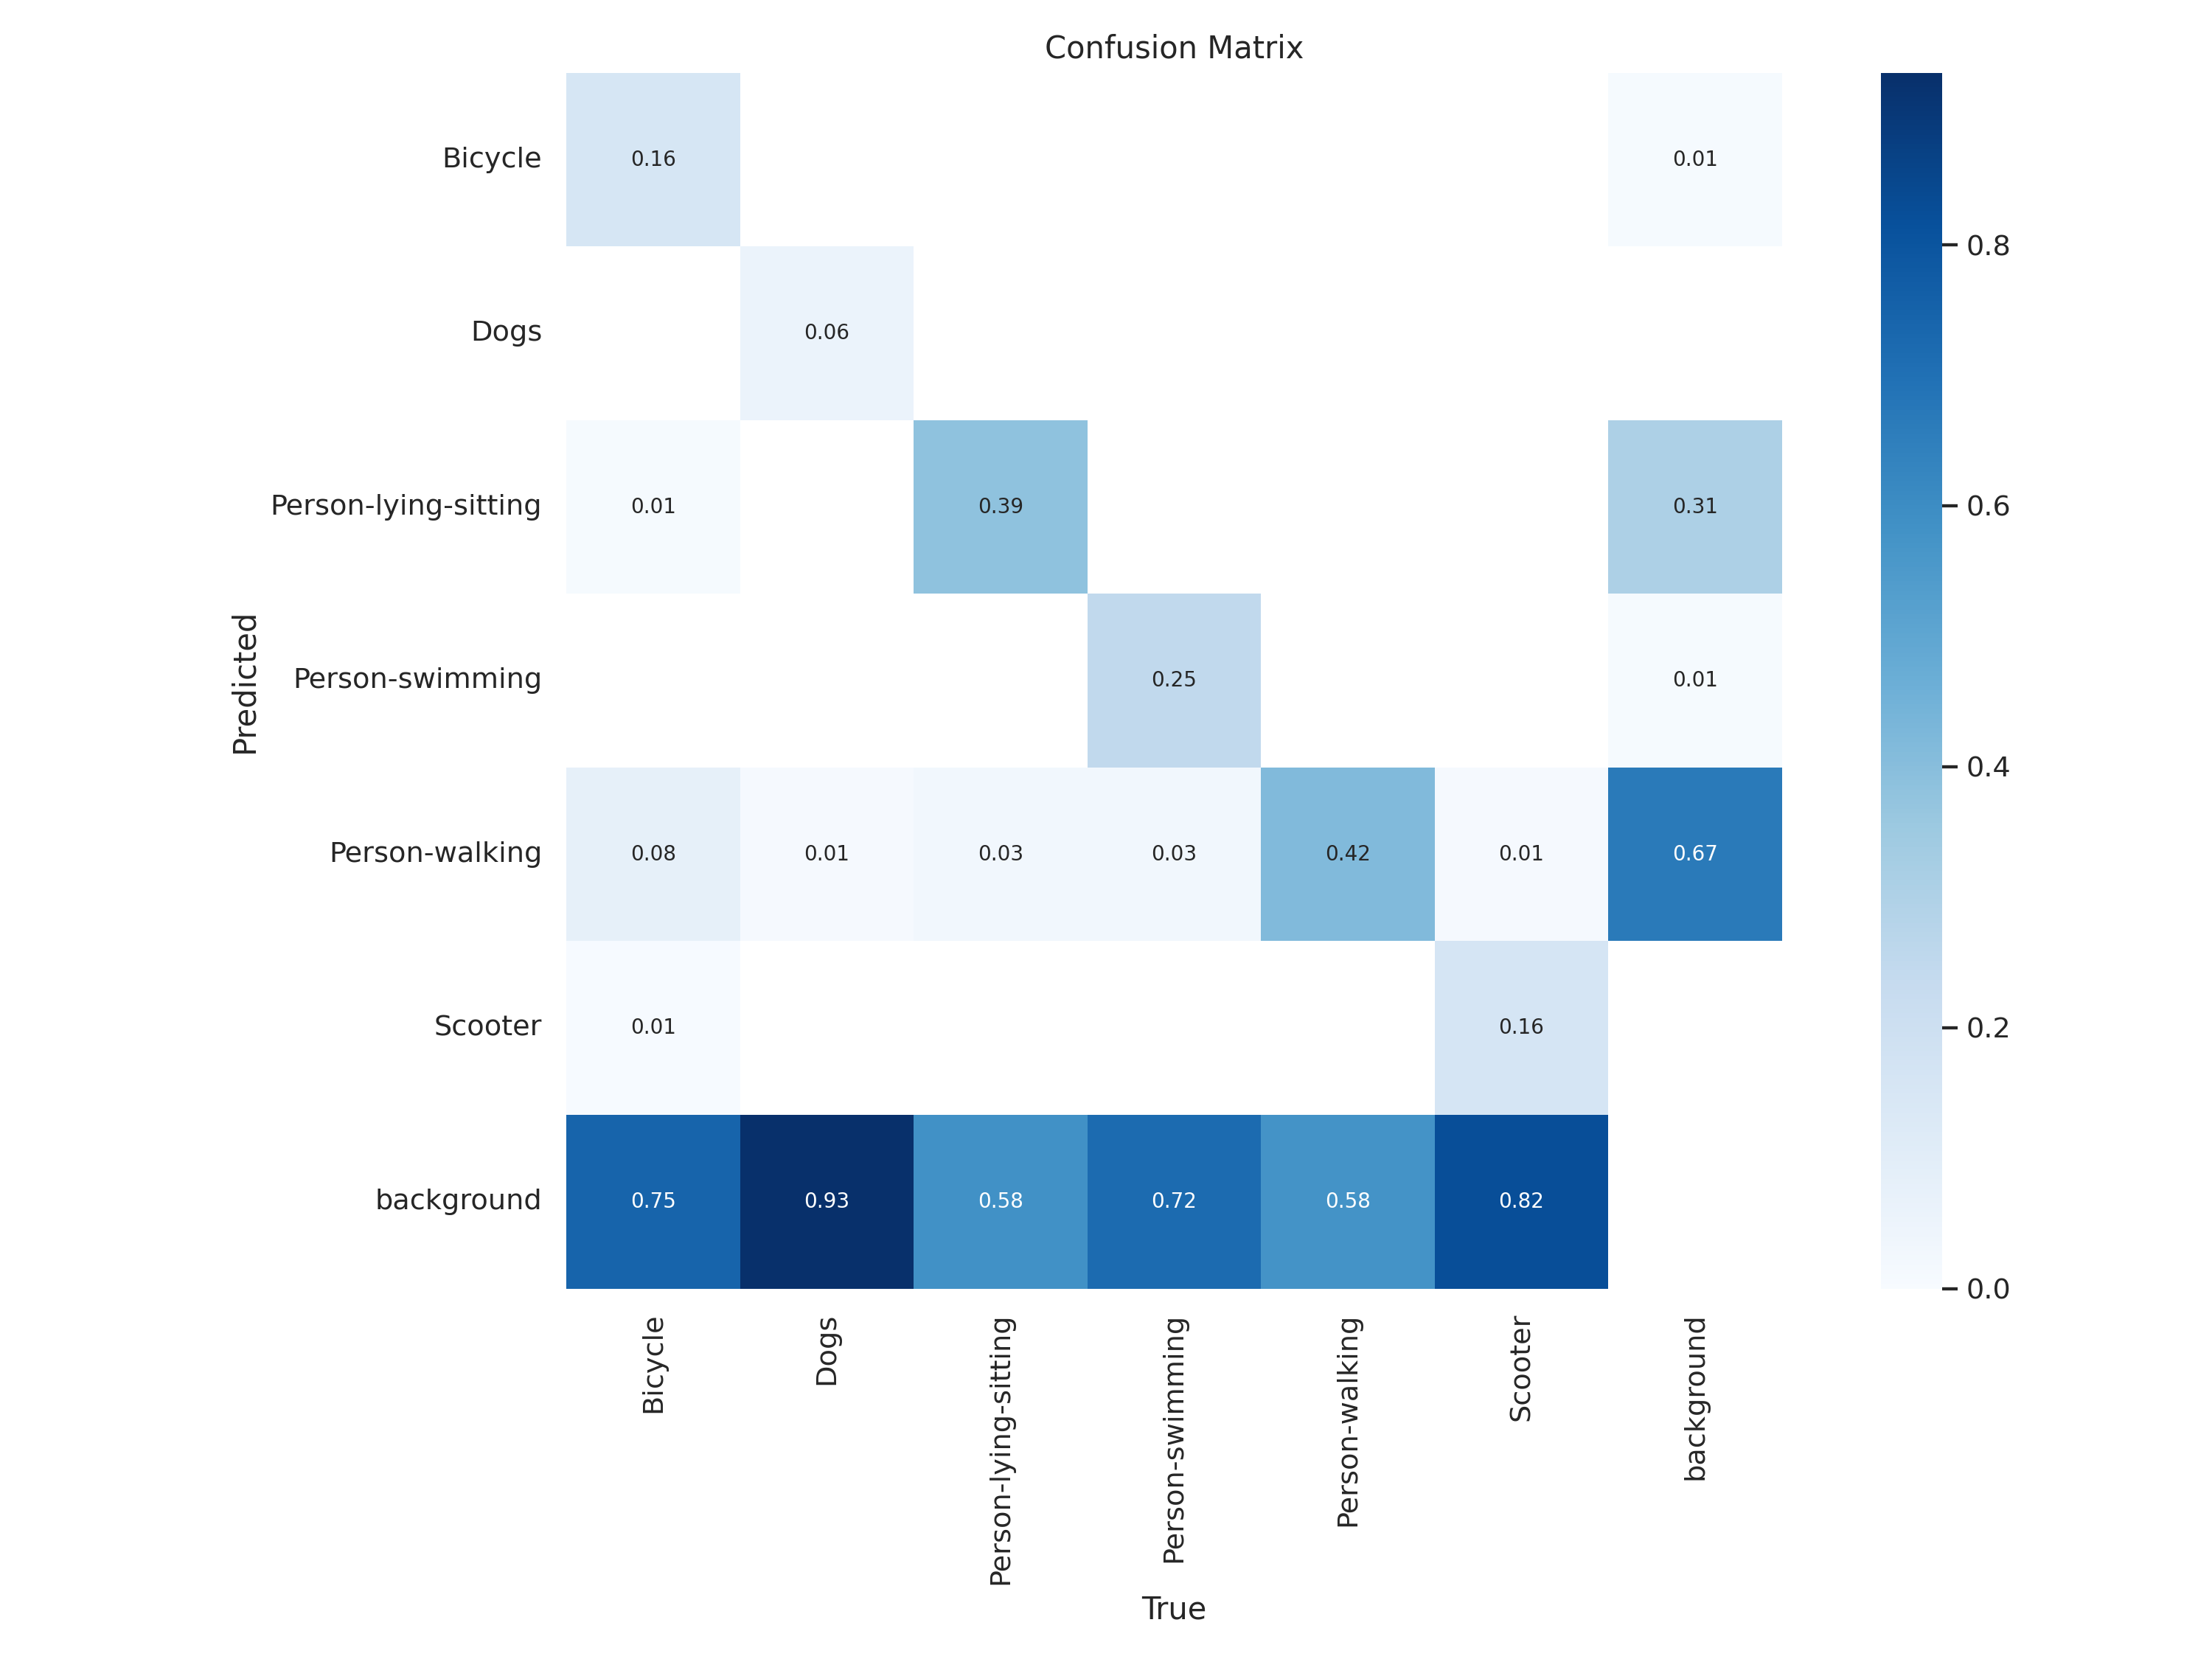

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


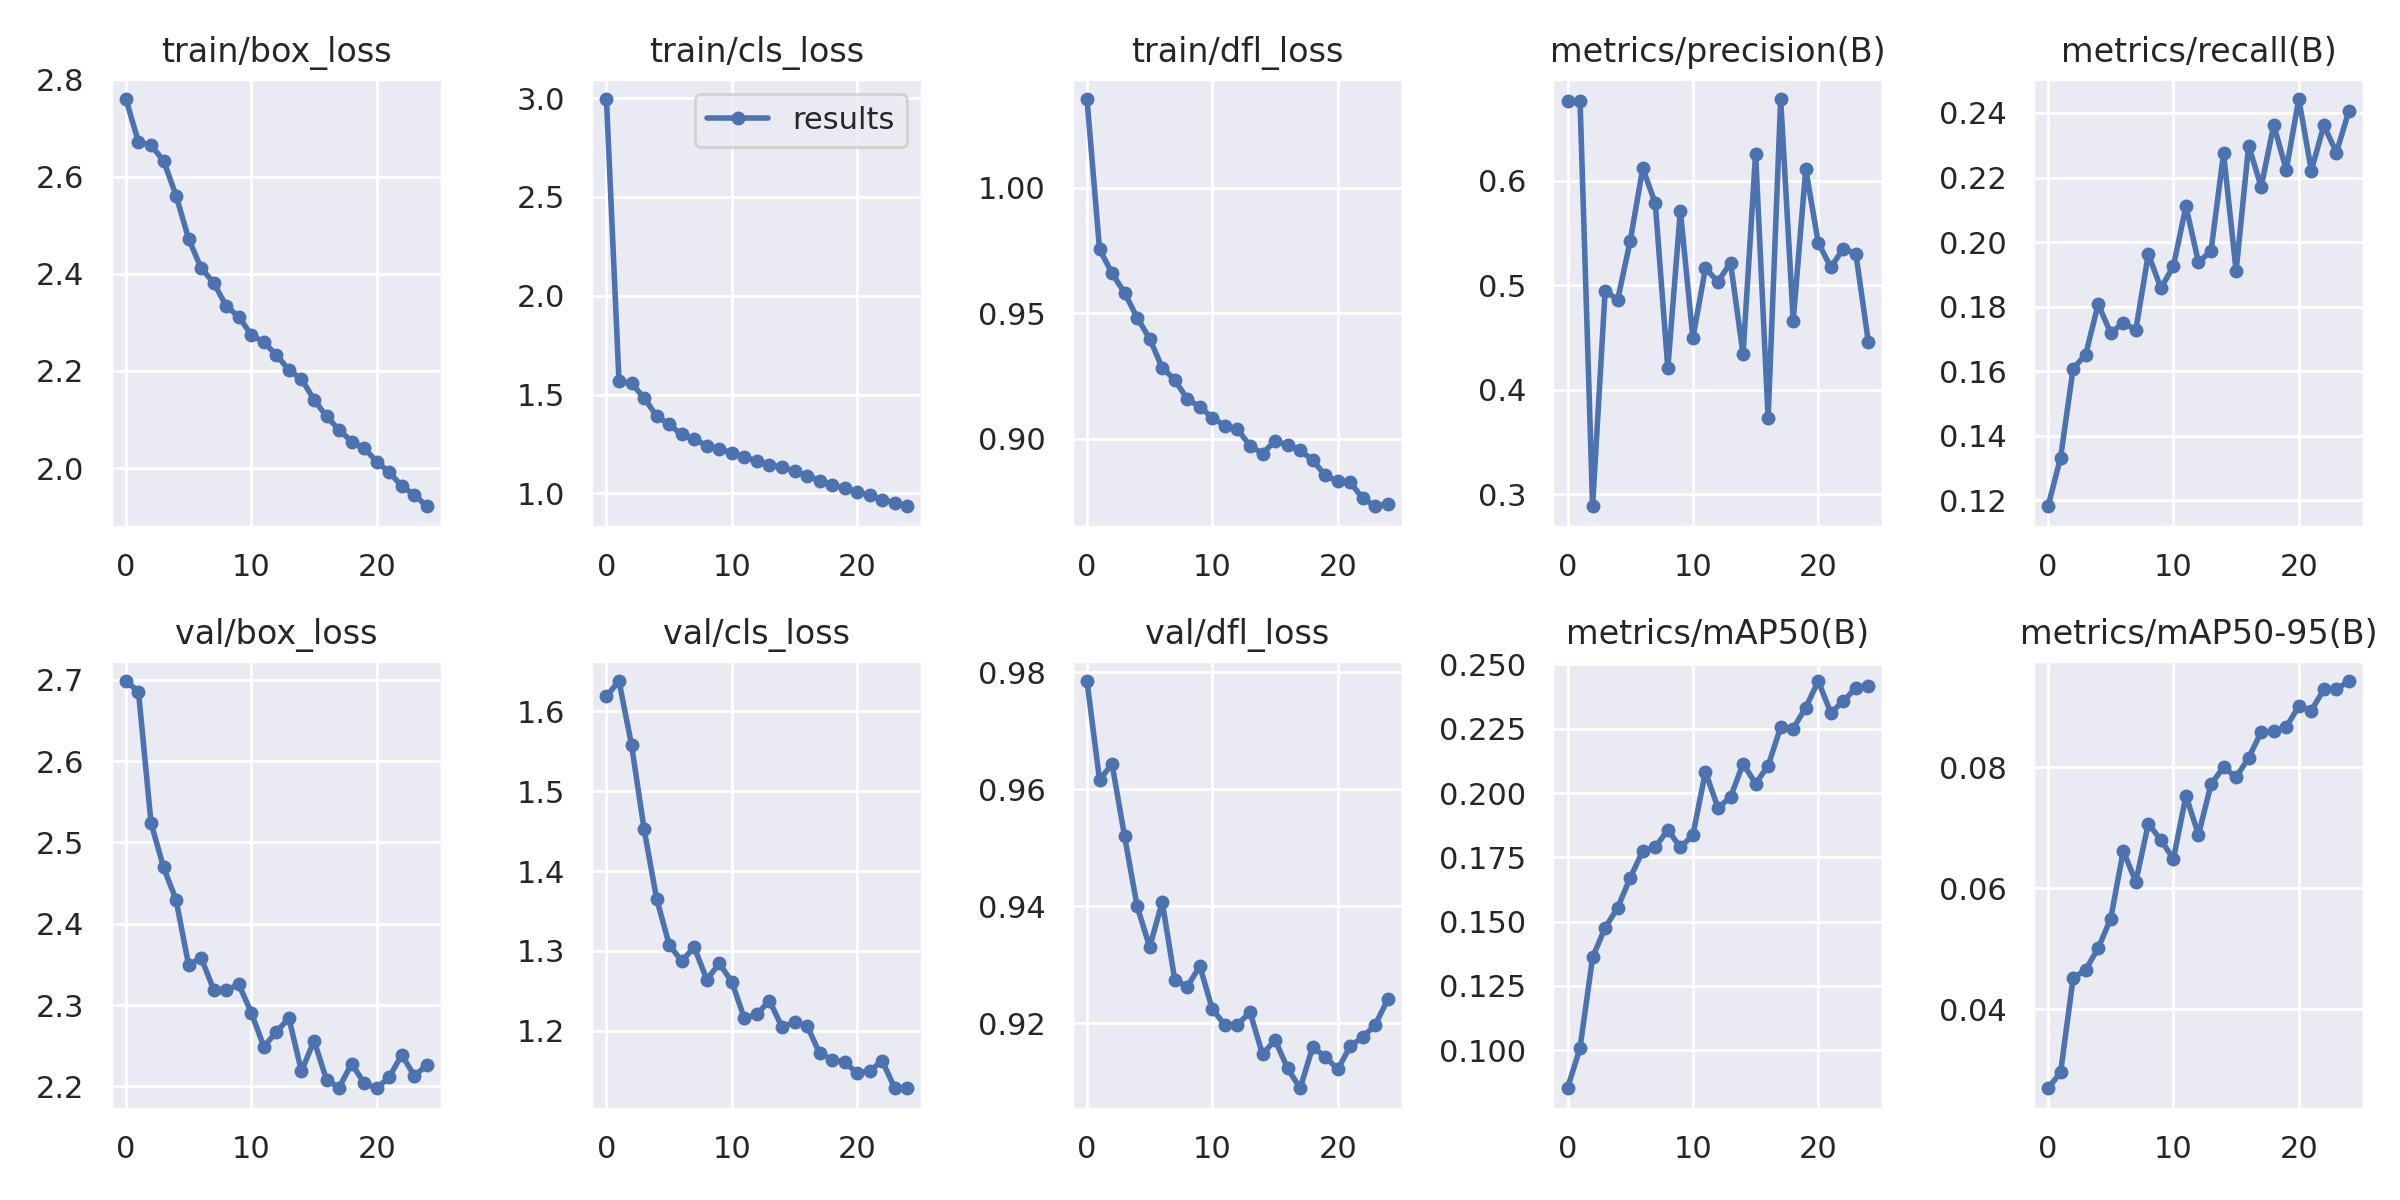

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


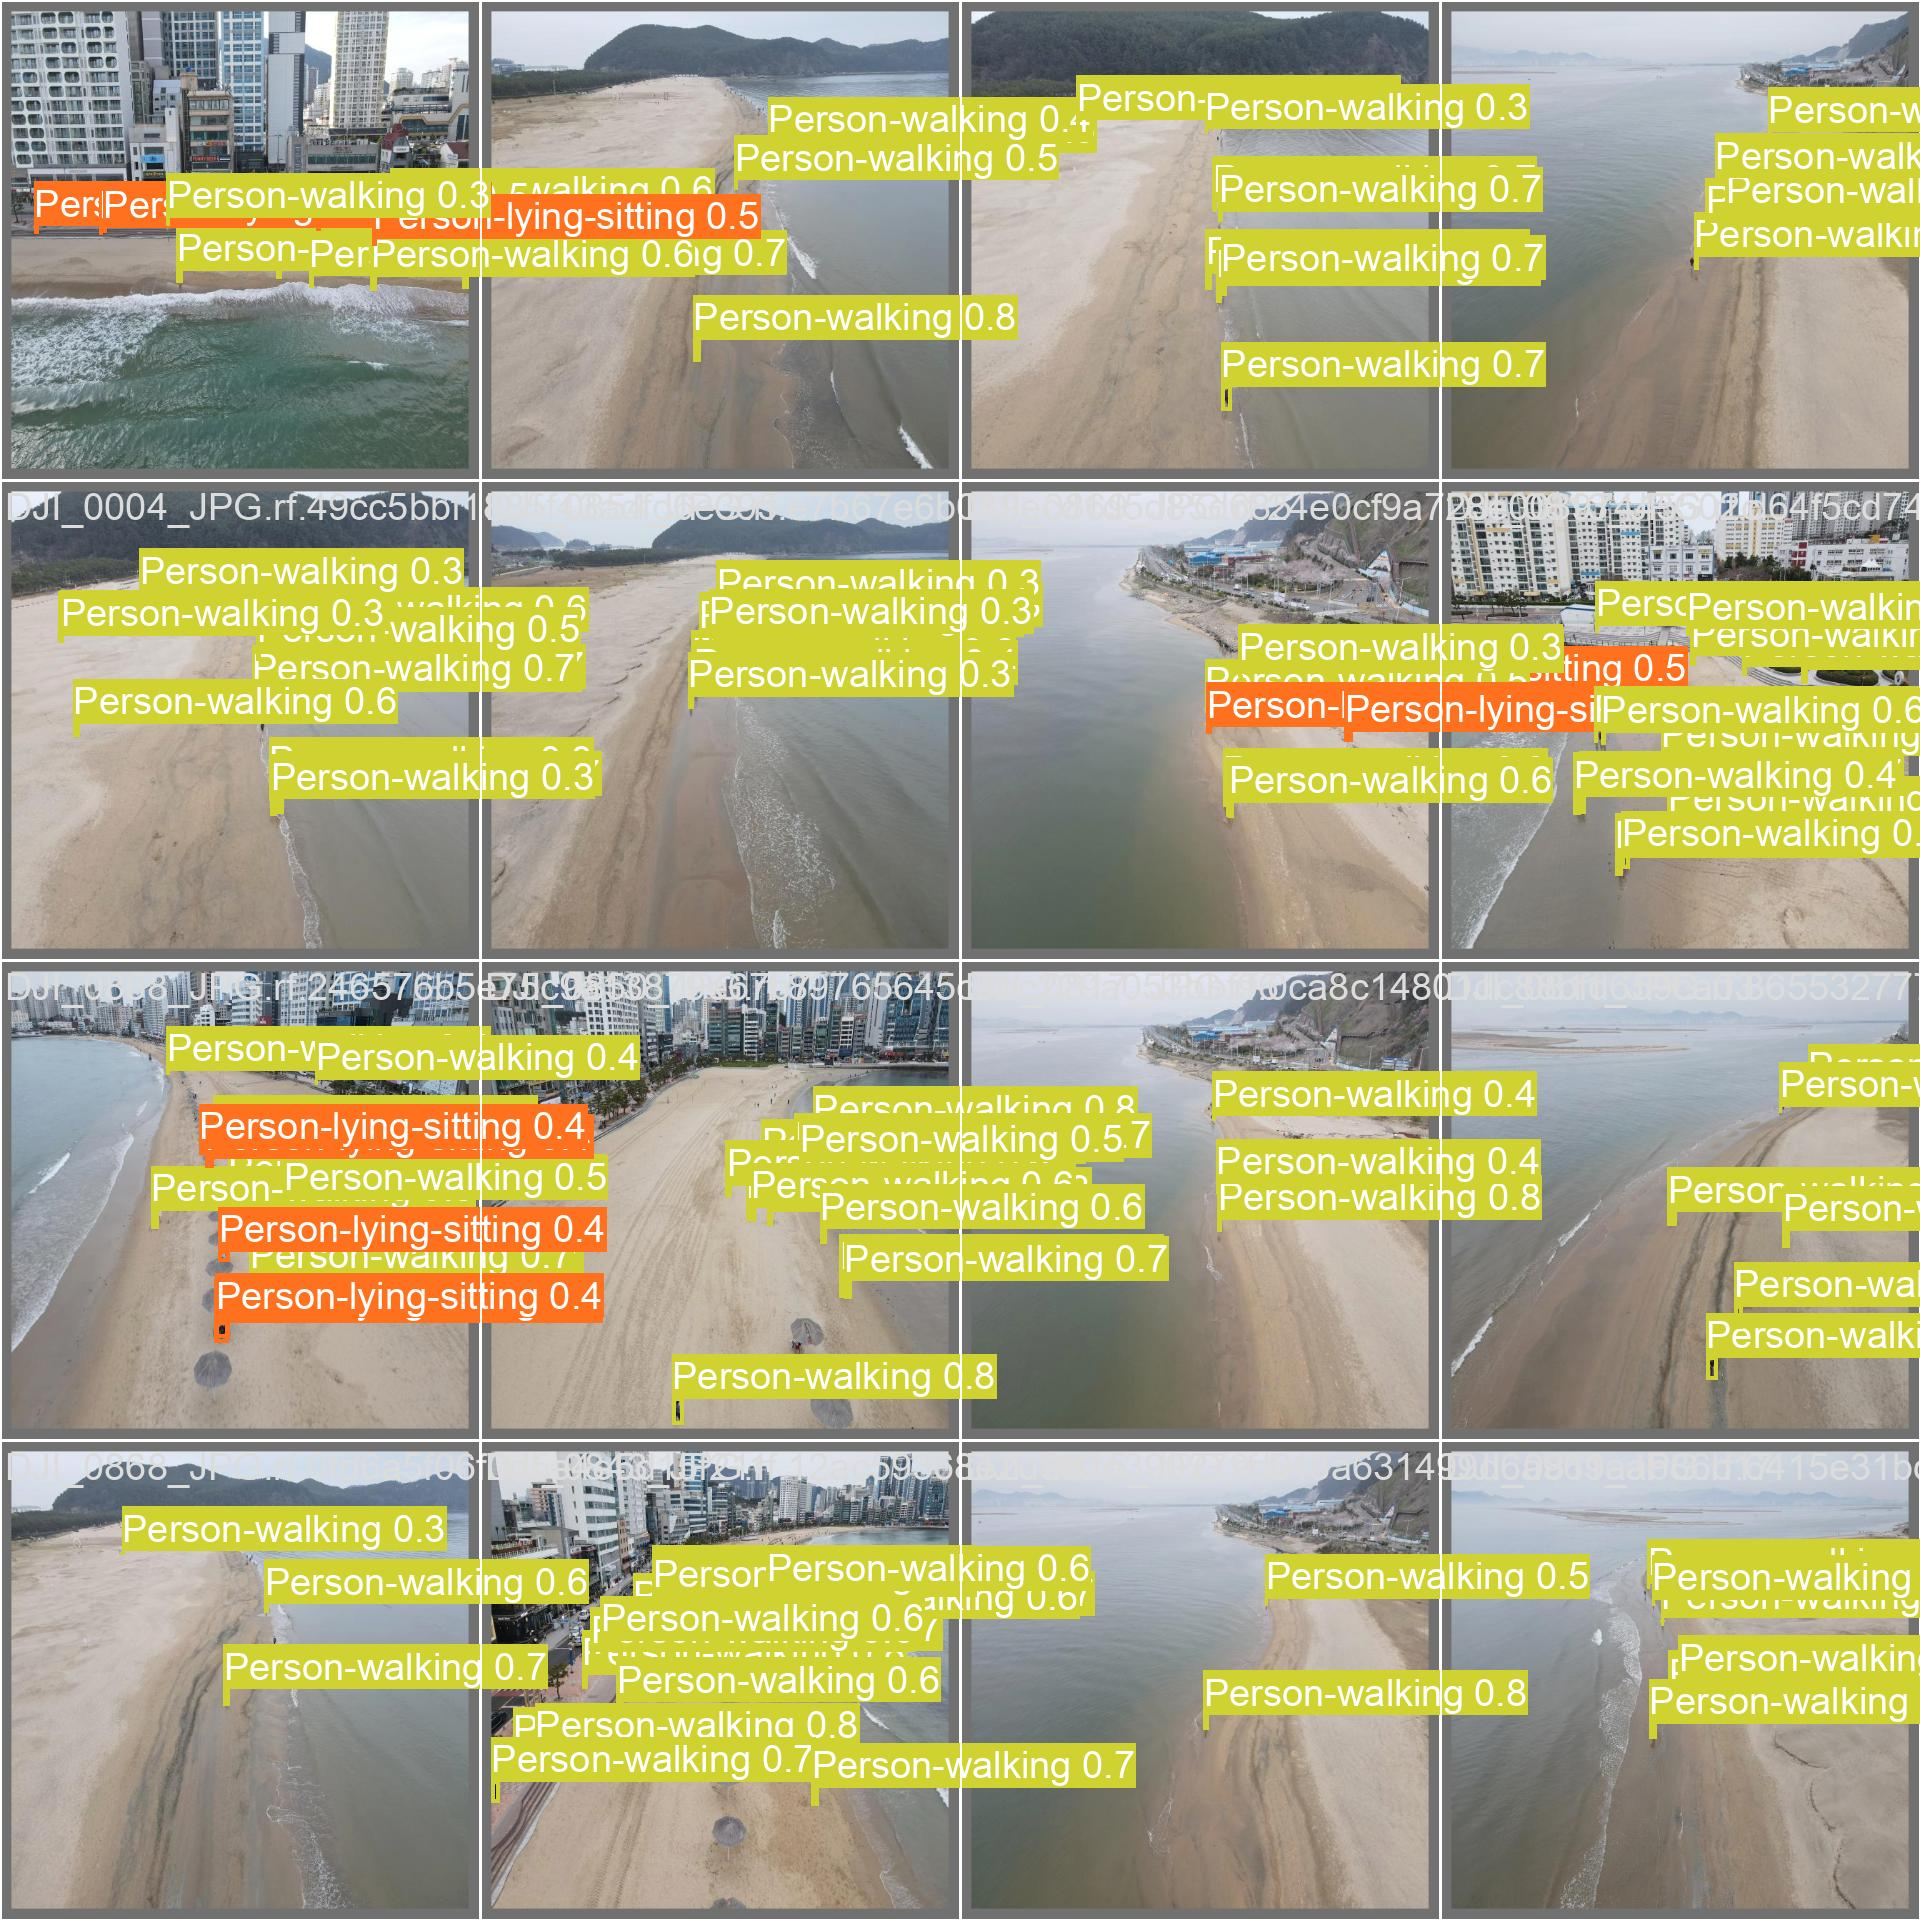

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [15]:
!zip -r weights.zip runs/detect/train/weights/

  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
